## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

W0711 21:18:23.471171 10068 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 21:18:23.489172 10068 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 21:18:23.494172 10068 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='sgd')

W0711 21:20:01.013750 10068 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0711 21:20:01.037751 10068 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0711 21:20:04.211933 10068 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0711 21:20:04.339940 10068 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 123us/step - loss: 2.0862 - acc: 0.2582 - val_loss: 1.9756 - val_acc: 0.2979
Epoch 2/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.8917 - acc: 0.3322 - val_loss: 1.8793 - val_acc: 0.3055
Epoch 3/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.8224 - acc: 0.3591 - val_loss: 1.8659 - val_acc: 0.3325
Epoch 4/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.7766 - acc: 0.3763 - val_loss: 1.8248 - val_acc: 0.3517
Epoch 5/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.7408 - acc: 0.3890 - val_loss: 1.7609 - val_acc: 0.3789
Epoch 6/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.7099 - acc: 0.3990 - val_loss: 1.7072 - val_acc: 0.4005
Epoch 7/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.6818 - acc: 0.4134 - val_loss: 1.

50000/50000 [==============================] - 6s 124us/step - loss: 1.1702 - acc: 0.5893 - val_loss: 1.3742 - val_acc: 0.5112
Epoch 60/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.1708 - acc: 0.5882 - val_loss: 1.5432 - val_acc: 0.4735
Epoch 61/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.1593 - acc: 0.5930 - val_loss: 1.3631 - val_acc: 0.5119
Epoch 62/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.1578 - acc: 0.5929 - val_loss: 1.4172 - val_acc: 0.4929
Epoch 63/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.1508 - acc: 0.5970 - val_loss: 1.4272 - val_acc: 0.4937
Epoch 64/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.1469 - acc: 0.5961 - val_loss: 1.4156 - val_acc: 0.5020
Epoch 65/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.1431 - acc: 0.5990 - val_loss: 1.3854 - val_acc: 0.5056
Epoch 66/500
50000/50000 [=======

Epoch 117/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.8575 - acc: 0.7054 - val_loss: 1.5077 - val_acc: 0.5078
Epoch 118/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.8477 - acc: 0.7070 - val_loss: 1.5406 - val_acc: 0.4973
Epoch 119/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.8514 - acc: 0.7022 - val_loss: 1.6159 - val_acc: 0.4731
Epoch 120/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.8392 - acc: 0.7102 - val_loss: 1.3414 - val_acc: 0.5497
Epoch 121/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.8367 - acc: 0.7111 - val_loss: 1.4893 - val_acc: 0.5054
Epoch 122/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.8290 - acc: 0.7131 - val_loss: 1.8031 - val_acc: 0.4644
Epoch 123/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.8268 - acc: 0.7143 - val_loss: 1.5256 - val_acc: 0.5065
Epoch 124/500

50000/50000 [==============================] - 6s 126us/step - loss: 0.5782 - acc: 0.8020 - val_loss: 1.6559 - val_acc: 0.5148
Epoch 176/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.5600 - acc: 0.8118 - val_loss: 1.6562 - val_acc: 0.5193
Epoch 177/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.5460 - acc: 0.8164 - val_loss: 1.7831 - val_acc: 0.4953
Epoch 178/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.5529 - acc: 0.8147 - val_loss: 1.6936 - val_acc: 0.5193
Epoch 179/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.5457 - acc: 0.8165 - val_loss: 1.6698 - val_acc: 0.5210
Epoch 180/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.5475 - acc: 0.8156 - val_loss: 2.1543 - val_acc: 0.4524
Epoch 181/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.5498 - acc: 0.8139 - val_loss: 1.6117 - val_acc: 0.5364
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 6s 124us/step - loss: 0.2825 - acc: 0.9132 - val_loss: 1.8364 - val_acc: 0.5358
Epoch 234/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.3333 - acc: 0.9005 - val_loss: 2.7854 - val_acc: 0.4193
Epoch 235/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.3083 - acc: 0.9075 - val_loss: 2.1021 - val_acc: 0.5041
Epoch 236/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.3196 - acc: 0.9026 - val_loss: 2.0369 - val_acc: 0.5065
Epoch 237/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.2930 - acc: 0.9072 - val_loss: 2.1699 - val_acc: 0.4927
Epoch 238/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.3064 - acc: 0.9067 - val_loss: 2.2557 - val_acc: 0.4944
Epoch 239/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.2826 - acc: 0.9148 - val_loss: 2.0222 - val_acc: 0.5119
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 6s 124us/step - loss: 0.1540 - acc: 0.9622 - val_loss: 2.1923 - val_acc: 0.5441
Epoch 292/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.1270 - acc: 0.9691 - val_loss: 2.2926 - val_acc: 0.5348
Epoch 293/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0978 - acc: 0.9793 - val_loss: 2.2140 - val_acc: 0.5433
Epoch 294/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0957 - acc: 0.9805 - val_loss: 2.6419 - val_acc: 0.5169
Epoch 295/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.2921 - acc: 0.9223 - val_loss: 2.2495 - val_acc: 0.5347
Epoch 296/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.1393 - acc: 0.9669 - val_loss: 2.2900 - val_acc: 0.5364
Epoch 297/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.0968 - acc: 0.9798 - val_loss: 2.2354 - val_acc: 0.5390
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 6s 125us/step - loss: 0.0382 - acc: 0.9963 - val_loss: 2.6614 - val_acc: 0.5270
Epoch 349/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.0364 - acc: 0.9968 - val_loss: 2.4744 - val_acc: 0.5461 - acc: 0 - ETA: 3s - l
Epoch 350/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0340 - acc: 0.9973 - val_loss: 2.5027 - val_acc: 0.5453
Epoch 351/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.0338 - acc: 0.9969 - val_loss: 2.5485 - val_acc: 0.5390ss: 0.0341 - acc:
Epoch 352/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.0347 - acc: 0.9963 - val_loss: 2.5107 - val_acc: 0.5464
Epoch 353/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0308 - acc: 0.9978 - val_loss: 2.5481 - val_acc: 0.5486loss: 0.0303  - ETA: 1s -
Epoch 354/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.0301 - acc: 0.9978

50000/50000 [==============================] - 6s 122us/step - loss: 0.0130 - acc: 0.9998 - val_loss: 2.8216 - val_acc: 0.5482
Epoch 406/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0130 - acc: 0.9998 - val_loss: 2.7951 - val_acc: 0.5512
Epoch 407/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.0128 - acc: 0.9998 - val_loss: 2.8056 - val_acc: 0.5475
Epoch 408/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0126 - acc: 0.9998 - val_loss: 2.8016 - val_acc: 0.5454
Epoch 409/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.0124 - acc: 0.9998 - val_loss: 2.7995 - val_acc: 0.5491
Epoch 410/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0123 - acc: 0.9997 - val_loss: 2.8032 - val_acc: 0.5518
Epoch 411/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0120 - acc: 0.9998 - val_loss: 2.8087 - val_acc: 0.5516
Epoch 412/500
50000/50000 [

50000/50000 [==============================] - 6s 120us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 2.9424 - val_acc: 0.5517
Epoch 464/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 2.9497 - val_acc: 0.5499
Epoch 465/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0073 - acc: 1.0000 - val_loss: 2.9730 - val_acc: 0.5438
Epoch 466/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 2.9728 - val_acc: 0.5466
Epoch 467/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 2.9639 - val_acc: 0.5487
Epoch 468/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 2.9612 - val_acc: 0.5505
Epoch 469/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 2.9665 - val_acc: 0.5490
Epoch 470/500
50000/50000 [

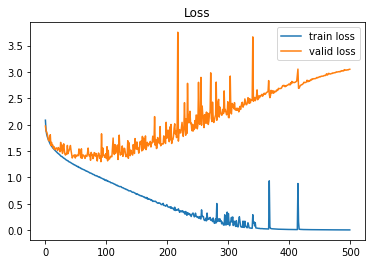

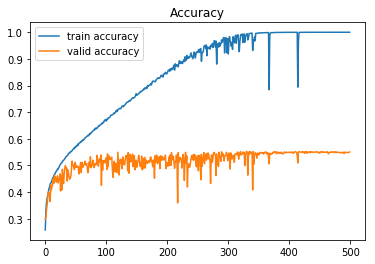

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()